# Table of content

- [1.0 Importing Libraries]()

- [2.0 Reading Dataset]()

- [3.0 Statistical Analysis and check dataset perform]()

  - [3.1 Data info]()
  - [3.2 Duplicated values]()
  - [3.3 convert Category to Labeled data]()

- [4.0 EAD]()

  - [4.1 precentage of spam and not spam emails]()
  - [4.2 Creating a new data set with a new columns to analysis them]()
  - [4.3 Text length Distribution]()
  - [4.4 Text Word Count Distribution]()

- [5.0 Text Preprocessing]()

- [6.0 Models]()


In [12]:
# reading datasets
import pandas as pd

# algebra
import numpy as np

# strings
import string


# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for the most used words
from wordcloud import WordCloud


# text preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk

# splitting the data
from sklearn.model_selection import train_test_split

# models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# pipelines
from sklearn.pipeline import Pipeline

# for evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

[1.0 Importing Libraries]()


In [13]:
emails = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Email-Spam-Detection/datasets/SPAM text message 20170820 - Data.csv"
)
emails

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# [3.0 Statistical Analysis and check dataset perform]()


[3.1 Data info]()


In [14]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


[3.2 Duplicated values]()


no null values


In [15]:
# check for duplicated values
emails["Message"].duplicated().sum()

415

there are 415 duplicated columns should be removed


In [16]:
# remove Duplicate
emails = emails.drop_duplicates()

[3.3 convert Category to Labeled data]()


In [17]:
def update(cat):
    if cat == "spam":
        return 1
    elif cat == "ham":
        return 0
    return cat


emails["Category"] = emails["Category"].apply(update)
emails.head()

/tmp/ipykernel_61492/1435655226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails["Category"] = emails["Category"].apply(update)


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# [4.0 EAD]()


[4.1 precentage of spam and not spam emails]()


In [18]:
spam = len(emails[emails["Category"] == 1])

ham = len(emails[emails["Category"] == 0])
sz = len(emails)

print("percentage of spam emails = ", spam * 100 / sz)
print("percentage of ham emails = ", ham * 100 / sz)

percentage of spam emails =  12.4297071941051
percentage of ham emails =  87.5702928058949


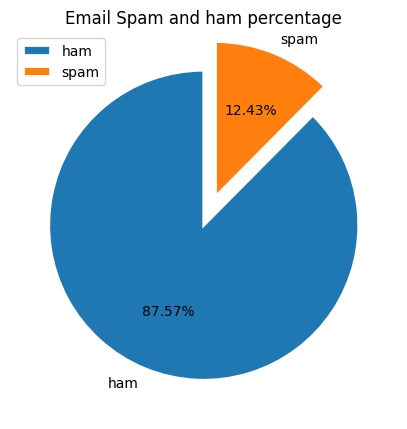

In [19]:
valus = emails["Category"].value_counts()

# create a size for plot
plt.figure(figsize=(5, 6))


# creat a pie chart with custom labels and explode parameter
plt.pie(
    valus,
    autopct="%0.2f%%",
    labels=["ham", "spam"],
    wedgeprops={"linewidth": 2, "edgecolor": "white"},
    explode=[0, 0.2],
    startangle=90,
)

# set a title for the chart
plt.title("Email Spam and ham percentage")

# showing the chart
plt.legend()
plt.show()

[4.2 Creating a new data set with a new columns to analysis them]()


In [20]:
temp = emails.copy()


# function for getting number of words in text
def get_words(text):
    # dividding text to words
    words = word_tokenize(text=text)
    return len(words)


# function for getting number of sentence in text
def get_sent(text):
    # dividding text to words
    sent = sent_tokenize(text=text)
    return len(sent)


# define a new text_characters column
temp["text_characters"] = emails["Message"].apply(len)


# define a new text_word_count column
temp["text_word_count"] = emails["Message"].apply(get_words)

# define a new text_len column
temp["text_sent_column"] = emails["Message"].apply(get_sent)

temp

,Category,Message,text_characters,text_word_count,text_sent_column
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will ü b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


[4.3 Text characters Distribution]()


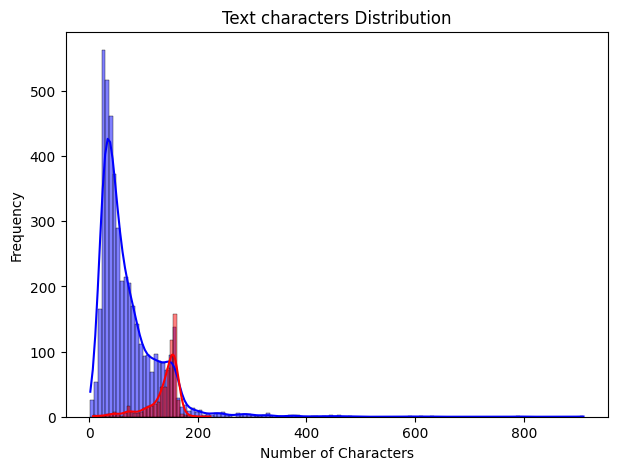

In [21]:
# create a size for plot
plt.figure(figsize=(7, 5))

# dividing dataset in 0 and 1 datasets
data_0 = temp[temp["Category"] == 0]["text_characters"]
data_1 = temp[temp["Category"] == 1]["text_characters"]

# histogram for Category 0 in color blue
sns.histplot(data=data_0, color="blue", kde=True)

# histogram for Category 1 in color red
sns.histplot(data=data_1, color="red", kde=True)

# set a X label
plt.xlabel("Number of Characters")

# set a Y label
plt.ylabel("Frequency")


# set a title for the chart
plt.title("Text characters Distribution")

plt.show()

[4.4 Text Word Count Distribution]()


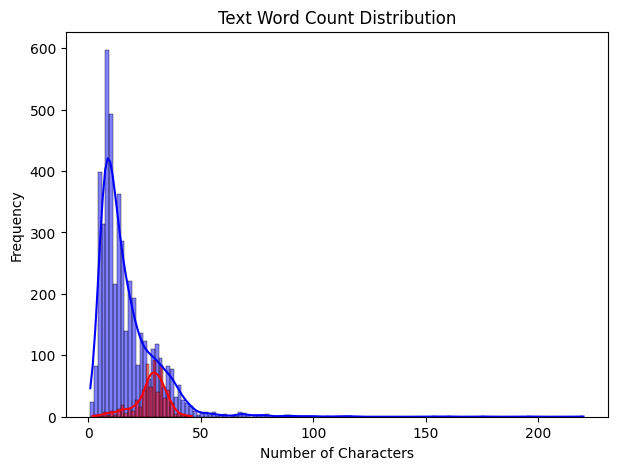

In [22]:
# create a size for plot
plt.figure(figsize=(7, 5))

# dividing dataset in 0 and 1 datasets
data_0 = temp[temp["Category"] == 0]["text_word_count"]
data_1 = temp[temp["Category"] == 1]["text_word_count"]

# histogram for Category 0 in color blue
sns.histplot(data=data_0, color="blue", kde=True)

# histogram for Category 1 in color red
sns.histplot(data=data_1, color="red", kde=True)

# set a X label
plt.xlabel("Number of Characters")

# set a Y label
plt.ylabel("Frequency")


# set a title for the chart
plt.title("Text Word Count Distribution")

plt.show()

# [5.0 Text Preprocessing]()


[5.1 Create Class contains all Preprocessing functions]()


In [23]:
class text_preprocessing:
    def __init__(self) -> None:
        pass

    def convert_text_to_lower(self, text=str):
        text = text.lower()
        return text

    def convert_text_to_words(self, text=str):
        words = word_tokenize(text)
        return words

    def remove_special_characters(self, words):

        fixed_words = []

        for w in words:
            if w.isalnum():
                fixed_words.append(w)

        return fixed_words

    def remove_stop_words(self, words):

        fixed_words = []

        stop_words = set(stopwords.words("english"))

        for w in words:
            if not stop_words.__contains__(w):
                fixed_words.append(w)

        return fixed_words

    def remove_punctuation(self, words):

        fixed_words = []
        punctuation = set(string.punctuation)

        for w in words:

            if not punctuation.__contains__(w):
                fixed_words.append(w)

        return fixed_words

    def stem_the_words(self, words):
        fixed_words = []

        ps = PorterStemmer()

        for w in words:
            stem_w = ps.stem(w)
            fixed_words.append(stem_w)

        return fixed_words

[5.2 Create a Preprcessed Text Column column from the Text Column]()


In [24]:
# function that will used to cinvert the column
def fixed_text(text):

    # defining an object from the text_preprocessing class
    process = text_preprocessing()

    # apply the process in the text
    text = process.convert_text_to_lower(text)
    words = process.convert_text_to_words(text)
    words = process.remove_special_characters(words)
    words = process.remove_stop_words(words)
    words = process.remove_punctuation(words)
    words = process.stem_the_words(words)
    ret = " ".join(words)
    return ret


# creating new Preprcessed_Text column
emails["Preprcessed_Text"] = emails["Message"].apply(fixed_text)

/tmp/ipykernel_61492/3243523745.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails["Preprcessed_Text"] = emails["Message"].apply(fixed_text)


In [25]:
emails

,Category,Message,Preprcessed_Text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will ü b going to esplanade fr home?,ü b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


[5.3 Word Cloud for Spam]()


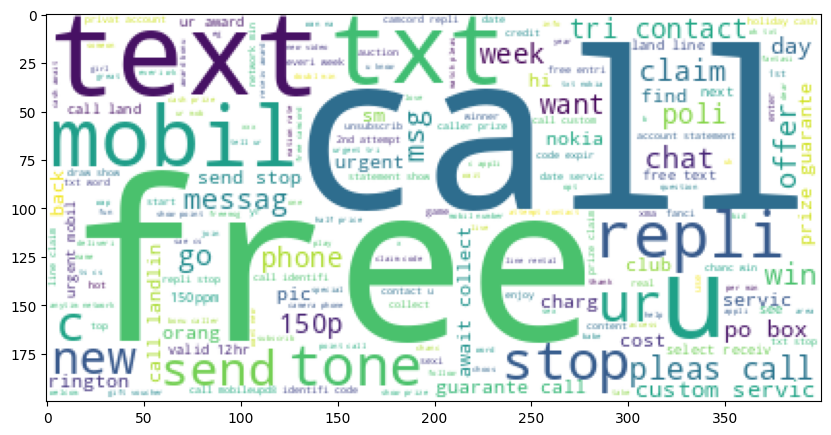

In [26]:
# set size for the photo
plt.figure(figsize=(10, 10))

data_1 = emails[emails["Category"] == 1]["Preprcessed_Text"]
wc = WordCloud(background_color="white")

photo = wc.generate(data_1.str.cat(sep=" "))

plt.imshow(photo)
plt.show()

[5.4 Word Cloud for not Spam]()


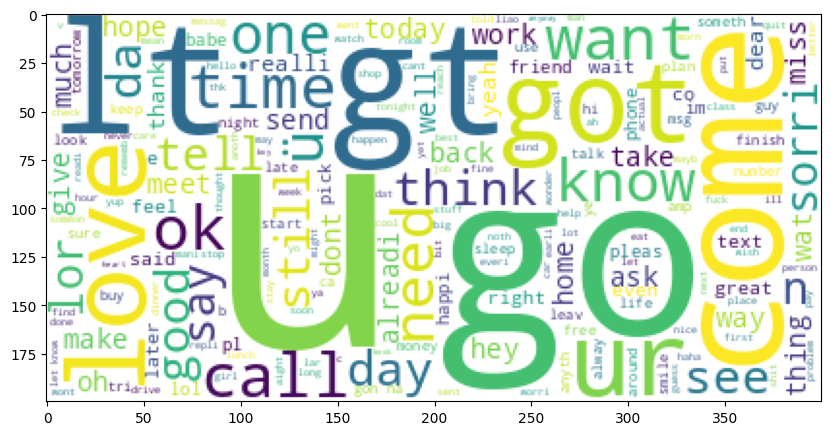

In [27]:
# set size for the photo
plt.figure(figsize=(10, 10))

data_0 = emails[emails["Category"] == 0]["Preprcessed_Text"]
wc = WordCloud(background_color="white")

photo = wc.generate(data_0.str.cat(sep=" "))

plt.imshow(photo)
plt.show()

[5.5 top 40 words of spam]()


In [28]:
all_spam_words = []

# get all words from spam emails
for text in emails[emails["Category"] == 1]["Preprcessed_Text"]:
    words = word_tokenize(text)
    for w in words:
        all_spam_words.append(w)

# convert them to dict by using nltk
all_spam_words = nltk.FreqDist(all_spam_words)

# get top 40
top_40 = dict(all_spam_words.most_common(40))

# print them
print(top_40)

{'call': 311, 'free': 186, '2': 154, 'txt': 139, 'text': 122, 'ur': 119, 'u': 115, 'mobil': 110, 'stop': 108, 'repli': 103, 'claim': 96, '4': 95, 'prize': 78, 'get': 73, 'new': 64, 'servic': 64, 'send': 60, 'tone': 59, 'urgent': 56, 'award': 55, 'nokia': 54, 'contact': 53, 'phone': 52, 'cash': 50, 'pleas': 50, 'week': 48, 'win': 46, 'min': 45, 'c': 43, 'guarante': 42, 'collect': 42, 'messag': 41, 'per': 40, 'custom': 39, 'chat': 37, 'tri': 36, 'msg': 35, 'number': 35, 'cs': 34, 'draw': 33}


/tmp/ipykernel_61492/49478961.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_40.keys(), y=top_40.values(), palette="Dark2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


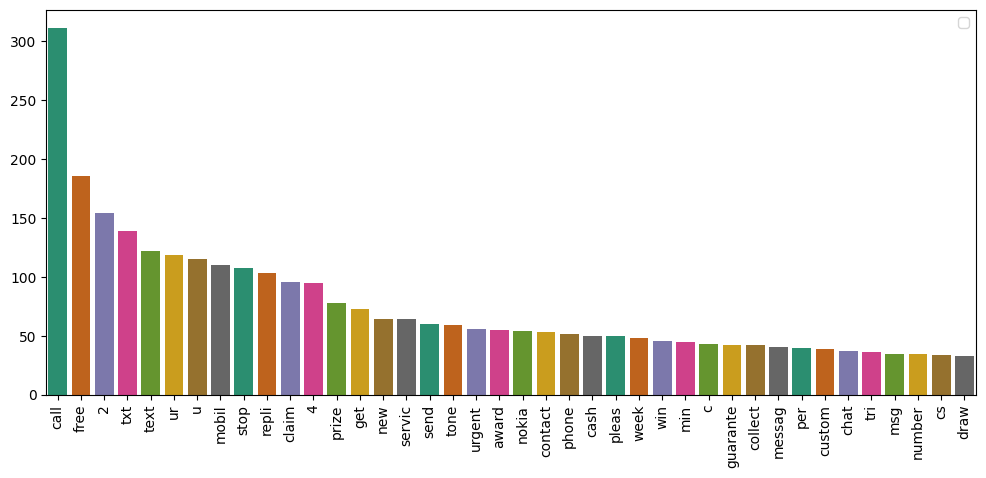

In [29]:
plt.figure(figsize=(12, 5))


sns.barplot(x=top_40.keys(), y=top_40.values(), palette="Dark2")

plt.xticks(rotation=90)

plt.legend()
plt.show()

[5.6 top 40 words of not spam]()


In [30]:
all_not_spam_words = []

# get all words from not spam emails
for text in emails[emails["Category"] == 0]["Preprcessed_Text"]:
    words = word_tokenize(text)
    for w in words:
        all_not_spam_words.append(w)

# convert them to dict by using nltk
all_not_spam_words = nltk.FreqDist(all_not_spam_words)

# get top 40
top_40 = dict(all_not_spam_words.most_common(40))

# print them
print(top_40)

{'u': 897, 'go': 407, 'get': 351, '2': 288, 'gt': 288, 'lt': 287, 'come': 278, 'got': 239, 'know': 237, 'like': 236, 'call': 235, 'love': 222, 'time': 220, 'ok': 218, 'good': 215, 'want': 209, 'ur': 203, 'day': 195, 'ü': 173, 'need': 171, 'one': 166, '4': 162, 'lor': 159, 'home': 152, 'think': 150, 'see': 148, 'take': 144, 'still': 144, 'da': 142, 'tell': 133, 'make': 129, 'say': 127, 'back': 127, 'today': 124, 'hope': 123, 'dont': 123, 'n': 121, 'ask': 121, 'sorri': 121, 'send': 120}


/tmp/ipykernel_61492/49478961.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_40.keys(), y=top_40.values(), palette="Dark2")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


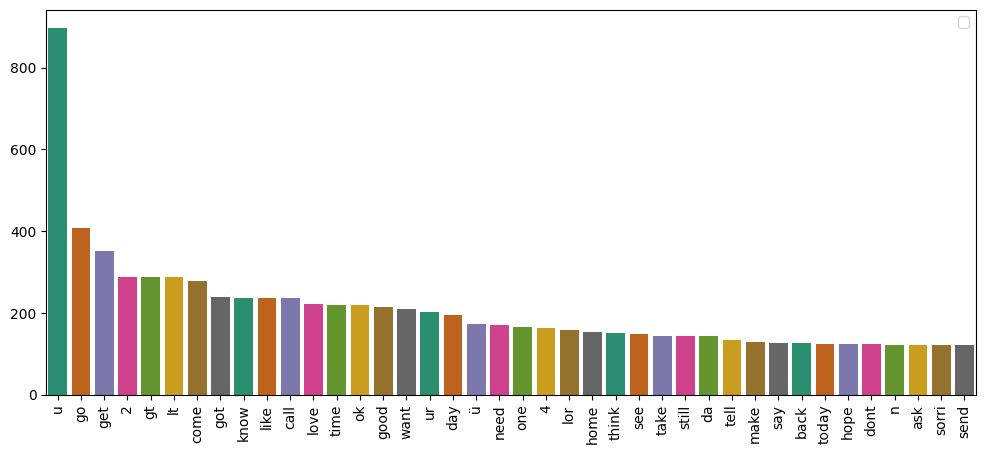

In [31]:
plt.figure(figsize=(12, 5))


sns.barplot(x=top_40.keys(), y=top_40.values(), palette="Dark2")

plt.xticks(rotation=90)

plt.legend()
plt.show()

# [6.0 Models]()


In [87]:
text = emails["Preprcessed_Text"]
target = emails["Category"]

x_train, x_test, y_train, y_test = train_test_split(
    text, target, test_size=0.2, random_state=42
)

In [88]:
td = TfidfVectorizer(max_features=3000)
count_vec = CountVectorizer(max_features=3000)

svm = Pipeline(
    steps=[("TfidfVectorizer", td), ("SVC", SVC(kernel="sigmoid", gamma=1, C=0.5))]
)

mnb = Pipeline(
    steps=[("CountVectorizer", count_vec), ("MultinomialNB", MultinomialNB())]
)

DCT = Pipeline(
    steps=[
        ("TfidfVectorizer", td),
        (
            "DecisionTreeClassifier",
            AdaBoostClassifier(
                estimator=DecisionTreeClassifier(),
                n_estimators=50,
                random_state=42,
                algorithm="SAMME",
            ),
        ),
    ]
)

xgbc = Pipeline(
    steps=[
        ("TfidfVectorizer", td),
        ("XGBClassifier", XGBClassifier(n_estimators=50, random_state=42)),
    ]
)

models = {
    "SVC": svm,
    "MultinomialNB": mnb,
    "DecisionTreeClassifier": DCT,
    "XGBClassifier": xgbc,
}

In [118]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_con_mat = confusion_matrix(list(y_train), list(train_pred))
    test_con_mat = confusion_matrix(list(y_test), list(test_pred))

    return train_acc, test_acc, train_con_mat, test_con_mat

In [124]:
con_matrices = []

for name, model in models.items():
    train_acc, test_acc, train_con_mat, test_con_mat = evaluate_model(
        model, x_train, x_test, y_train, y_test
    )
    print("model name is ", name)
    print("model train_acc = ", train_acc)
    print("model test_acc = ", test_acc)
    con_matrices.append([train_con_mat, test_con_mat, name])
    print()

model name is  SVC
model train_acc =  0.9774545454545455
model test_acc =  0.9748062015503876

model name is  MultinomialNB
model train_acc =  0.9878787878787879
model test_acc =  0.9796511627906976

model name is  DecisionTreeClassifier
model train_acc =  0.9995151515151515
model test_acc =  0.9612403100775194

model name is  XGBClassifier
model train_acc =  0.9861818181818182
model test_acc =  0.9689922480620154



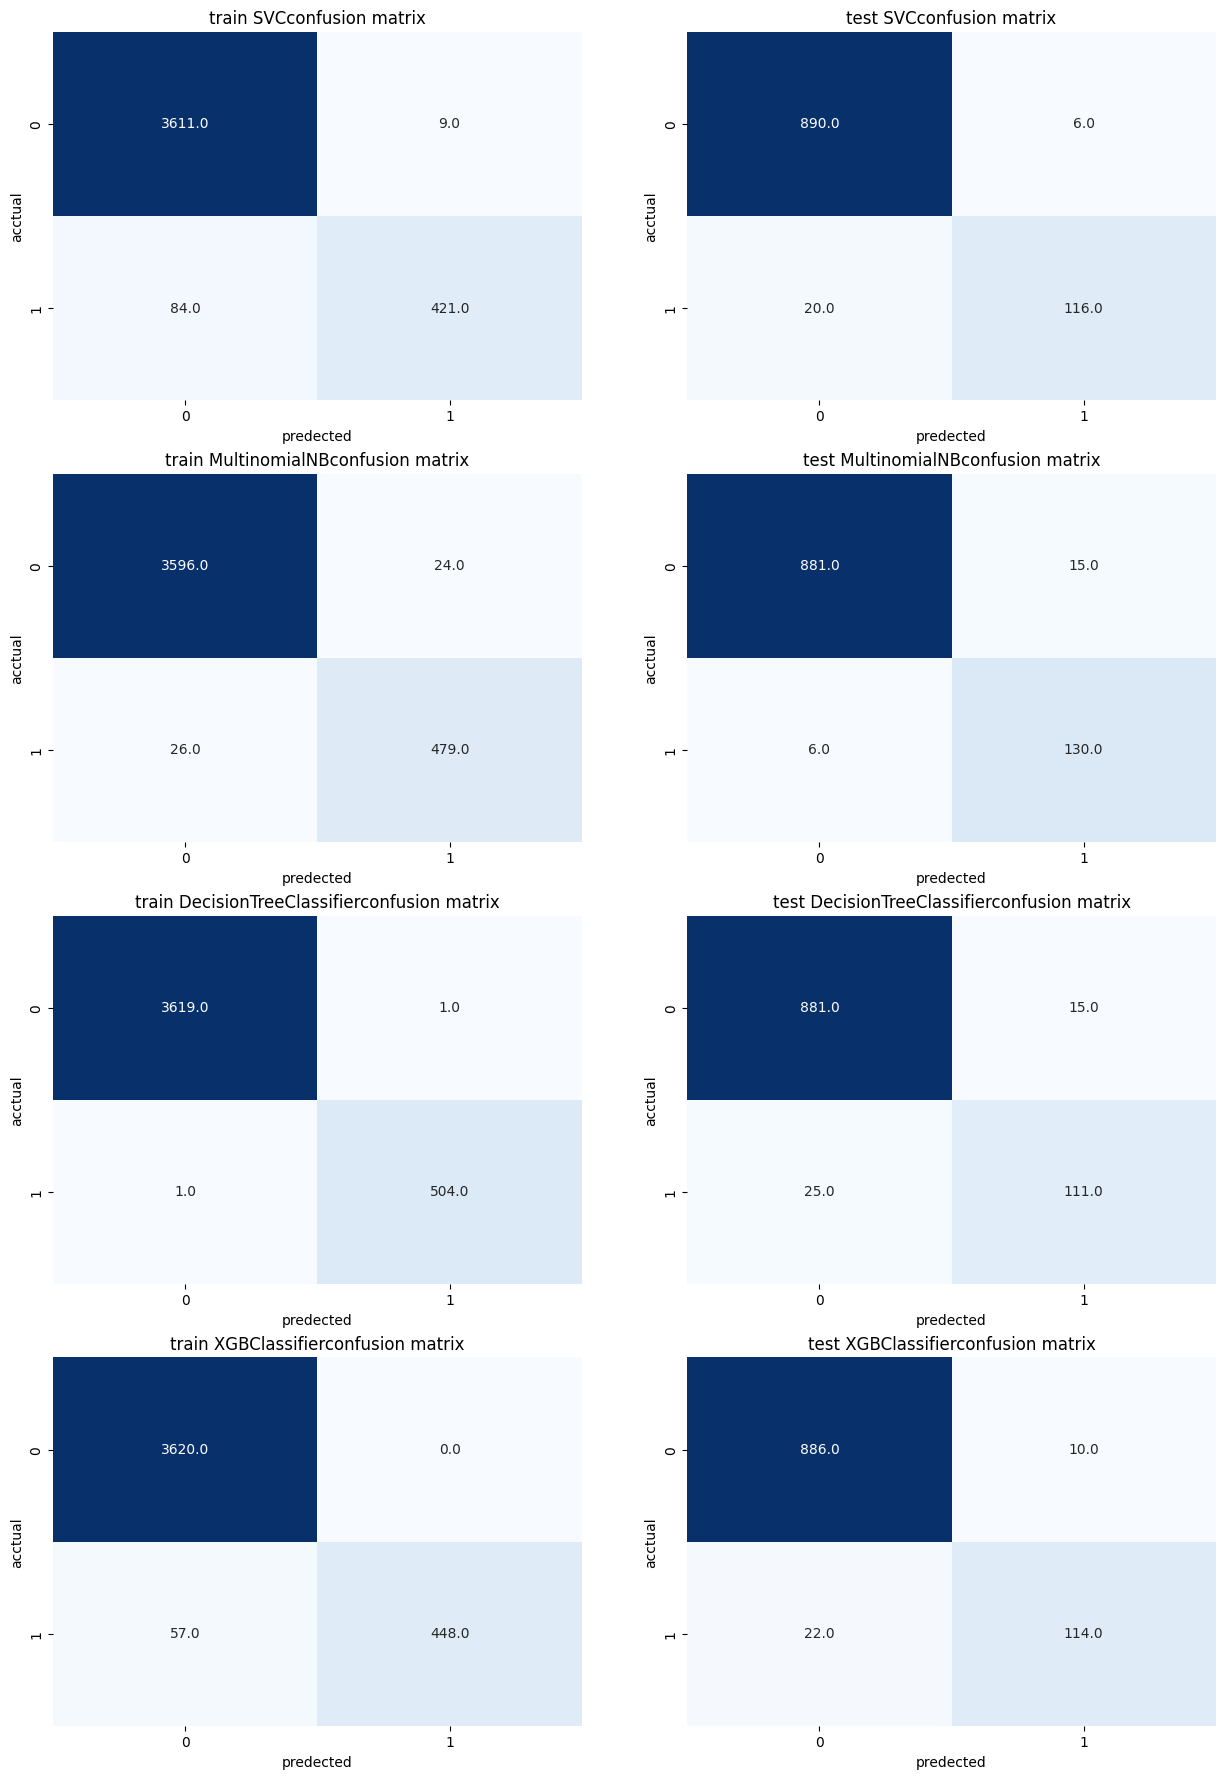

In [139]:
fig, ax = plt.subplots(4, 2, figsize=(15, 22))


for i, mat in enumerate(con_matrices):
    axs1 = ax[i, 0]
    axs2 = ax[i, 1]

    sns.heatmap(mat[0], annot=True, fmt=".1f", cmap="Blues", cbar=False, ax=axs1)
    axs1.set_title("train " + mat[2] + "confusion matrix")
    axs1.set_ylabel("acctual")
    axs1.set_xlabel("predected")

    sns.heatmap(mat[1], annot=True, fmt=".1f", cmap="Blues", cbar=False, ax=axs2)
    axs2.set_title("test " + mat[2] + "confusion matrix")
    axs2.set_ylabel("acctual")
    axs2.set_xlabel("predected")

plt.show()